Exploring the raw data
In this chapter, you'll be introduced to the problem you'll be solving in this course. How do you accurately classify line-items in a school budget based on what that money is being used for? You will explore the raw text and numeric values in the dataset, both quantitatively and visually. And you'll learn how to measure success when trying to predict class labels for each row of the dataset.

# 1. Introducing the challenge
### 1.1 What category of problem is this?
You're no novice to data science, but let's make sure we agree on the basics.

As Peter from [DrivenData](https://www.drivendata.org/) explained in the video, you're going to be working with school district budget data. This data can be classified in many ways according to certain labels, e.g. `Function: Career & Academic Counseling`, or `Position_Type: Librarian`.

Your goal is to develop a model that predicts the probability for each possible label by relying on some correctly labeled examples.

What type of machine learning problem is this?

Possible Answers:
1. Reinforcement Learning, because the model is learning from the data through a system of rewards and punishments.
2. Unsupervised Learning, because the model doesn't output labels with certainty.
3. Unsupervised Learning, because not all data is correctly classified to begin with.
4. Supervised Learning, because the model will be trained using labeled examples.

<div align=right><b>Answer:</b> Using correctly labeled budget line items to train</div>
<div align=right>means this is a supervised learning problem. (4)</div>

### 1.2 What is the goal of the algorithm?
As you know from previous courses, there are different types of supervised machine learning problems. In this exercise you will tell us what type of supervised machine learning problem this is, and why you think so.

Remember, your goal is to correctly label budget line items by training a supervised model to predict the probability of each possible label, taking most probable label as the correct label.

Possible Answers:
1. Regression, because the model will output probabilities.
2. Classification, because predicted probabilities will be used to select a label class.
3. Regression, because probabilities take a continuous value between 0 and 1.
4. Classification, because the model will output probabilities.

<div align=right><b>Answer:</b> Specifically, we have ourselves a multi-class-multi-label classification problem (quite a mouthful!), </div>
<div align=right>because there are 9 broad categories that each take on many possible sub-label instances. (2)</div>

# 2. Exploring the data
### 2.1 Loading the data
Now it's time to check out the dataset! You'll use pandas (which has been pre-imported as pd) to load your data into a DataFrame and then do some Exploratory Data Analysis (EDA) of it.

The training data is available as `TrainingData.csv`. Your first task is to load it into a DataFrame in the IPython Shell using `pd.read_csv()` along with the keyword argument `index_col=0`.

Use methods such as `.info()`, `.head()`, and `.tail()` to explore the budget data and the properties of the features and labels.

Some of the column names correspond to __features__ - descriptions of the budget items - such as the `Job_Title_Description` column. The values in this column tell us if a budget item is for a teacher, custodian, or other employee.

Some columns correspond to the budget item __labels__ you will be trying to predict with your model. For example, the `Object_Type` column describes whether the budget item is related classroom supplies, salary, travel expenses, etc.

Use `df.info()` in the IPython Shell to answer the following questions:
* How many rows are there in the training data?
* How many columns are there in the training data?
* How many non-null entries are in the Job_Title_Description column?

In [1]:
# Import pandas
import pandas as pd
# Load file into DataFrame: df
df = pd.read_csv('_datasets/TrainingSetSample.csv', index_col=0)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 198 to 101861
Data columns (total 25 columns):
Function                  1560 non-null object
Use                       1560 non-null object
Sharing                   1560 non-null object
Reporting                 1560 non-null object
Student_Type              1560 non-null object
Position_Type             1560 non-null object
Object_Type               1560 non-null object
Pre_K                     1560 non-null object
Operating_Status          1560 non-null object
Object_Description        1461 non-null object
Text_2                    382 non-null object
SubFund_Description       1183 non-null object
Job_Title_Description     1131 non-null object
Text_3                    296 non-null object
Text_4                    193 non-null object
Sub_Object_Description    364 non-null object
Location_Description      874 non-null object
FTE                       449 non-null float64
Function_Description      1340 non-null object
F

### Possible Answers:
1. 26 rows, 1560 columns, 1560 non-null entries in Job_Title_Description.
2. 26 rows, 1560 columns, 1131 non-null entries in Job_Title_Description.
3. 1560 rows, 26 columns, 1131 non-null entries in Job_Title_Description.
4. 1560 rows, 26 columns, 1560 non-null entries in Job_Title_Description.
<div align=right><b>Answer:</b> (3)</div>

### 2.2 Summarizing the data
You'll continue your EDA in this exercise by computing summary statistics for the numeric data in the dataset. The data has been pre-loaded into a DataFrame called `df`.

You can use `df.info()` above to determine which columns of the data are numeric, specifically type `float64`. You'll notice that there are two numeric columns, called `FTE` and `Total`.

* `FTE`: Stands for "full-time equivalent". If the budget item is associated to an employee, this number tells us the percentage of full-time that the employee works. A value of 1 means the associated employee works for the school full-time. A value close to 0 means the item is associated to a part-time or contracted employee.
* `Total`: Stands for the total cost of the expenditure. This number tells us how much the budget item cost.

After printing summary statistics for the numeric data, your job is to plot a histogram of the non-null `FTE` column to see the distribution of part-time and full-time employees in the dataset.

_This course touches on a lot of concepts you may have forgotten, so if you ever need a quick refresher, download the [Scikit-Learn Cheat Sheet](../Scikit-Learn_Cheat_Sheet.pdf) and keep it handy!_

### Instructions:
* Print summary statistics of the numeric columns in the DataFrame `df` using the `.describe()` method.
* Import `matplotlib.pyplot` as `plt`.
* Create a histogram of the non-null `'FTE'` column. You can do this by passing `df['FTE'].dropna()` to `plt.hist()`.
* The title has been specified and axes have been labeled.

In [3]:
# Print the summary statistics
df.describe()

,FTE,Total
count,449.000000,1.542000e+03
mean,0.493532,1.446867e+04
std,0.452844,7.916752e+04
min,-0.002369,-1.044084e+06
25%,0.004310,1.108111e+02
50%,0.440000,7.060299e+02
75%,1.000000,5.347760e+03
max,1.047222,1.367500e+06


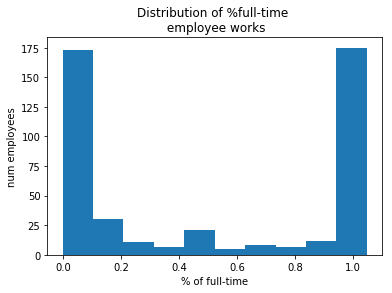

In [5]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline

# Create the histogram
plt.hist(df['FTE'].dropna())

# Add title and labels
plt.title('Distribution of %full-time \n employee works')
plt.xlabel('% of full-time')
plt.ylabel('num employees')

# Display the histogram
plt.show()

The high variance in expenditures makes sense (some purchases are cheap some are expensive). Also, it looks like the FTE column is bimodal. That is, there are some part-time and some full-time employees.